In [1]:
# Neuropixel DeepInterpolation network:

# Key recording parameters:

# Neuropixels Phase 3a probes
# 374 simultaneous recording sites across 3.84 mm, 10 reference channels
# Four-column checkerboard site layout with 20 µm spacing between rows
# 30 kHz sampling rate
# 500x hardware gain setting
# 500 Hz high pass filter in hardware, 150 Hz high-pass filter applied offline.
# Pre-processing: Median subtraction was applied to individual probes to remove signals that were common across all recording sites. Each probe recording was mean-centered and normalized with a single pair of value for all nodes on the probe.
# Docker hub id : 245412653747/deep_interpolation:allen_neuropixel
# Dropxbox link : https://www.dropbox.com/sh/tm3epzil44ybalq/AACyKxfvvA2T_Lq_rnpHnhFma?dl=0

In [1]:
# Run "python -m deepinterpolation.cli.training --help" OR "python -m deepinterpolation.cli.inference --help" in the terminal to view the list and explanation of all parameters

In [ ]:
# EphysGenerator:
#     This generator is used when dealing with a single dat file storing a
#     continous raw neuropixel recording as a (time, 384, 2) int16 array.

# https://github.com/AllenInstitute/deepinterpolation/blob/master/deepinterpolation/generator_collection.py#L553

In [2]:
import numpy as np

In [3]:
import os
import pathlib
from deepinterpolation.cli.inference import Inference

if __name__ == '__main__':
    generator_param = {}
    inference_param = {}

    # We are reusing the data generator for training here. Some parameters like
    # steps_per_epoch are irrelevant but currently needs to be provided
    generator_param["name"] = "EphysGenerator"
    generator_param["pre_post_frame"] = 30
    generator_param["pre_post_omission"] = 1

    generator_param["data_path"] = "/home/jupyter-ikharitonov/RANCZLAB-NAS/test_recording.dat"
    # Note the CLI has changed train_path to data_path to take into account
    # the use of generators for inference

    generator_param["batch_size"] = 100
    generator_param["start_frame"] = 0
    generator_param["end_frame"] = -1  # -1 to go until the end.

    inference_param["name"] = "core_inferrence"

    # Replace this path to where you stored your model
    filename = "2020_02_29_15_28_unet_single_ephys_1024_mean_squared_error-1050.h5"
    local_path = "/home/jupyter-ikharitonov/RANCZLAB-NAS/iakov/di_pretrained/" + filename
    inference_param["model_source"] = {
        "local_path": local_path
    }

    # Replace this path to where you want to store your output file
    inference_param["output_file"] = "/home/jupyter-ikharitonov/RANCZLAB-NAS/denoised_test_recording.h5"

    # This option is to add blank frames at the onset and end of the output
    # movie if some output frames are missing input frames to go through
    # the model. This could be present at the start and end of the movie.
    inference_param["output_padding"] = False

    args = {
        "generator_params": generator_param,
        "inference_params": inference_param,
        "output_full_args": True
    }

    inference_obj = Inference(input_data=args, args=[])
    inference_obj.run()

INFO:root:randomize should be set to False for inference.                         Overriding the parameter
INFO:Inference:wrote /home/jupyter-ikharitonov/RANCZLAB-NAS/inference_full_args.json
2023-10-15 14:43:07.812638: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
INFO:Inference:wrote /home/jupyter-ikharitonov/RANCZLAB-NAS/2023_10_15_14_42_inference.json
INFO:Inference:wrote /home/jupyter-ikharitonov/RANCZLAB-NAS/2023_10_15_14_42_generator.json
INFO:deepinterpolation.inferrence_collection:Created empty HDF5 file /home/jupyter-ikharitonov/RANCZLAB-NAS/denoised_test_recording.h5
INFO:Inference:created objects for inference
2023-10-15 14:43:08.253607: W tensorflow/core/comm

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [9]:
with h5py.File('/home/jupyter-ikharitonov/RANCZLAB-NAS/denoised_test_recording.h5', "r") as f: 
    print(f['data'].shape)
    denoised_data = np.array(f['data'])

(2039938, 384, 2)


In [10]:
denoised_data.shape

(2039938, 384, 2)

(0.0, 10000.0)

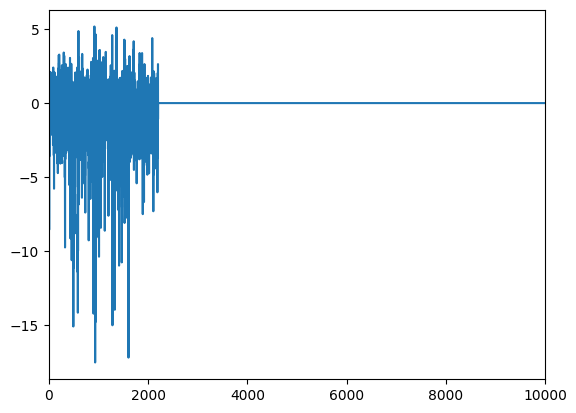

In [21]:
plt.plot(denoised_data[:,300,0])
plt.xlim([0,10000])

(2180.0, 2205.0)

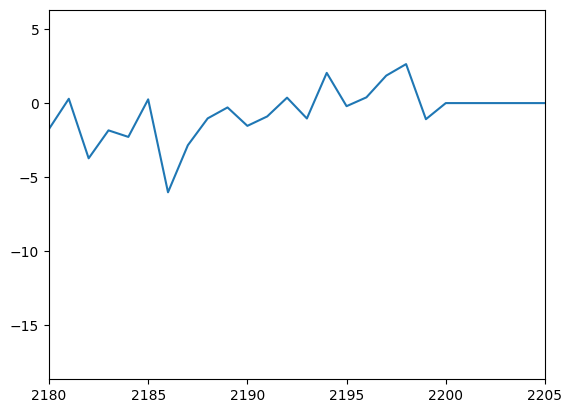

In [28]:
plt.plot(denoised_data[:,300,0])
plt.xlim([2180,2205])